(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2779 - val_loss: 0.1935
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1737 - val_loss: 0.1556
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1457 - val_loss: 0.1346
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1295 - val_loss: 0.1221
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1192 - val_loss: 0.1138
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1121 - val_loss: 0.1078
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1029 - val_loss: 0.1001
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1001 - val_loss: 0.0977
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss:

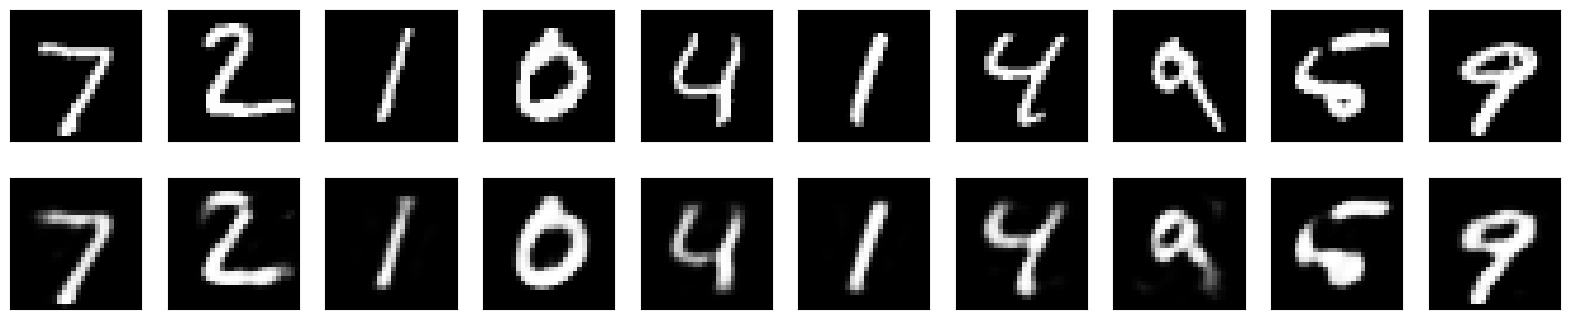

In [4]:
# Importing the Keras library which is used for building neural networks
import keras
from keras import layers

# Importing the MNIST dataset from Keras, a popular dataset of handwritten digits
from keras.datasets import mnist
# Importing numpy for numerical computing and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# Setting the size of our encoded representations (the size of the compressed data)
encoding_dim = 32

# Defining the input layer of our autoencoder with the shape of a flattened MNIST image
input_img = keras.Input(shape=(784,))

# Creating the encoding layer that compresses the input image into a smaller representation
encoded = layers.Dense(encoding_dim, activation="relu")(input_img)

# Creating the decoding layer that attempts to reconstruct the original image from its compressed form
decoded = layers.Dense(784, activation="sigmoid")(encoded)

# Defining the autoencoder model that maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# Defining the encoder model that maps an input to its encoded (compressed) representation
encoder = keras.Model(input_img, encoded)

# This is the input placeholder for the encoded (32-dimensional) data
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieving the last layer of the autoencoder model, which is our decoder layer
decoder_layer = autoencoder.layers[-1]

# Creating the decoder model that will take in encoded data and output the decoded (reconstructed) data
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compiling the autoencoder with Adam optimizer and binary crossentropy loss
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

# Loading the MNIST dataset and normalizing it to have values between 0 and 1
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Reshaping the training and test data to flatten the images into vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Printing the shape of the training and test datasets
print(x_train.shape)
print(x_test.shape)

# Training the autoencoder using the training data with specified epochs and batch size
# Also shuffling the training data and using the test data as validation data
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encoding and decoding images from the test set to see how well our autoencoder performs
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Setting up visualization of the results with matplotlib
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Displaying the original test images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Displaying the reconstructed images from the autoencoder
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()